## Tests for getting BMD

In [125]:
import matplotlib.pyplot as plt
import numpy as np

L = 1200 # Length of bridge
n = 1200 + 2*52 # Discretize into 1 mm seg.
P = 400 # Total weight of train [N]
x = [] # x-axis
xi = 0
for i in range(0, n+1):
    x.append(xi)
    xi += L/(n)

x_train = [52, 228, 392, 568, 732, 908] # train load locations
P_train = [P/6] * 6 # load at each location

n_train = 12 # number of train locations

# train start locations
t_loc = [-52]
for i in range (1, n_train):
    t_loc.append(t_loc[0] + (344/(n_train-1) * (i))) # CHECK THIS
print("train start locations", t_loc)

SFDi = [] # 1 SFD for each train loc
BMDi = [] # 1 BMD for each train loc
bm_loc = []
for i in range(n_train): # avoid aliasing
    SFDi.append([0]*len(x))
    bm_loc.append([0])
    #BMDi.append([0]*len(x))
maxS = [0]*n_train # maximum shear force for each loc
maxB = [0]*n_train # maximum bending moment for each loc


# How to decide which locations to use?
for i in range(0, len(t_loc)):

    # REACTION FORCES
    
    # sum of moments at A
    Fb = 0
    sf_loc = [] # shear force locations
    for xp in range(len(x_train)):
        Fb += P_train[xp] * (t_loc[i] + x_train[xp])
        sf_loc.append(t_loc[i] + x_train[xp])
    Fb /= 1200 # dist between supports always 1200mm
    # sum of forces in y
    Fa = sum(P_train) - Fb

    # Bending Moment list
    bm_loc[i] = [0]
    bm_loc[i].extend(sf_loc)
    bm_loc[i].append(1200)
    print()
    print("bending moment locations:", bm_loc[i])
    BMDi.append([0]*len(bm_loc[i])) # + 2 for reaction forces 
    #print(BMDi[i])

    print("Fa", Fa, "Fb", Fb)
    print("shear force locations", sf_loc)
    print("shear forces", P_train)

    # no uniform load so no applied loads thing for now

    # SHEAR FORCE DATA
    
    # Add to SFD

    #print("initial SFDi[i][0]", i, SFDi[i][0])
    for j in range(0, len(SFDi[i])):
        SFDi[i][j] += Fa
    print(SFDi[i][0])
    for xs in range(0, len(sf_loc)):
        #print(sf_loc[xs], SFDi[i][int(sf_loc[xs])] - P_train[xs])
        for j in range(int(sf_loc[xs]), len(SFDi[i])):
            SFDi[i][j] -= P_train[xs]
    #SFDi[i][-1] += Fb
    #SFDi[i][0] = Fa
    SFDi[i][-1] = 0
    #print(SFDi[i][-1])

    '''
    print()
    print("SF at 1st load:", SFDi[i][sf_loc[0]])
    print("SF just past 1st load:", SFDi[i][sf_loc[0]+1])
    for k in range(1, len(sf_loc)):
        print("SF just before load", str(k+1) + ":", SFDi[i][sf_loc[k]-1])
        print("SF at load", str(k+1) + ":", SFDi[i][sf_loc[k]])
    '''

    
    # BENDING MOMENT DATA
    '''
    -------------------------------------------
    Manually integrate by taking area under rectangles
    because there is too much error with trapz (we should
    *not* be getting negative moment).
    -------------------------------------------
    '''

    print()
    print("SF at Fa:", SFDi[i][bm_loc[i][0]])
    print("SF just past Fa:", SFDi[i][bm_loc[i][0]+1])
    for k in range(1, len(bm_loc[i])-1):
        print("SF just before load", str(k) + ":", SFDi[i][int(bm_loc[i][k])-1])
        print("SF at load", str(k) + ":", SFDi[i][int(bm_loc[i][k])])
    print("SF just before Fb:", SFDi[i][-2])
    print("SF at Fb:", SFDi[i][-1])
    
    BMDi[i][0] = 0
    for j in range(1, len(bm_loc[i])):
        #print(j, bm_loc[i][j], SFDi[i][round(bm_loc[i][j])-1])
        #print("rect base:", round(bm_loc[i][j])-round(bm_loc[i][j-1]))
        BMDi[i][j] = BMDi[i][j-1] + (int(bm_loc[i][j])-int(bm_loc[i][j-1])) * (SFDi[i][int(bm_loc[i][j])-1])
    BMDi[i][-1] = 0

    print("BM data")
    for xs in range(len(bm_loc[i])):
        print(bm_loc[i][xs], BMDi[i][xs])

    
for i in range(0, n_train):
    s1 = max(SFDi[i])
    s2 = -min(SFDi[i]) # bc shear force can be negative
    maxS[i] = max([s1, s2])
    if i == 0 or i == (n_train-1):
        maxS[i] = max([maxS[i], Fa, Fb])
    maxB[i] = max(BMDi[i])

#print()
#print(SFDi[i])
print(BMDi[i])
print()
print(maxS, maxB)
print()
print(max(maxS), max(maxB))

print(len(x)) # because I originally accidentally used x somewhere else

train start locations [-52, -20.727272727272727, 10.545454545454547, 41.81818181818181, 73.0909090909091, 104.36363636363637, 135.63636363636363, 166.9090909090909, 198.1818181818182, 229.45454545454544, 260.72727272727275, 292.0]

bending moment locations: [0, 0, 176, 340, 516, 680, 856, 1200]
Fa 257.33333333333337 Fb 142.66666666666666
shear force locations [0, 176, 340, 516, 680, 856]
shear forces [66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667]
257.33333333333337

SF at Fa: 190.66666666666669
SF just past Fa: 190.66666666666669
SF just before load 1: 0
SF at load 1: 190.66666666666669
SF just before load 2: 190.66666666666669
SF at load 2: 124.00000000000001
SF just before load 3: 124.00000000000001
SF at load 3: 57.33333333333334
SF just before load 4: 57.33333333333334
SF at load 4: -9.333333333333329
SF just before load 5: -9.333333333333329
SF at load 5: -76.0
SF just before load 6: -76.0
SF at load 6: -142.66666

1305
1305
8

-52 257.3333333333333
73.0909090909091 69422.9090909091


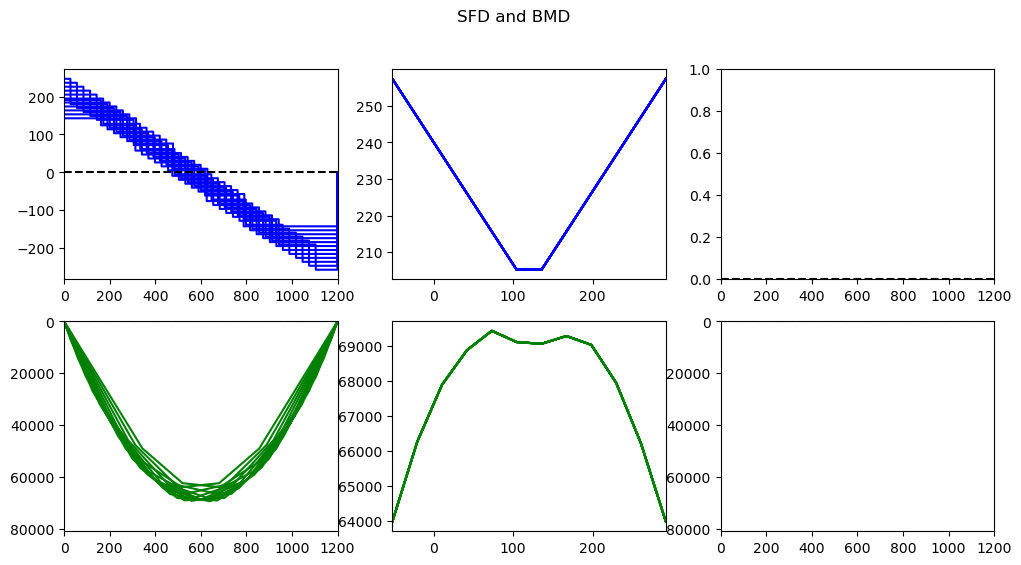

In [126]:
# plot with subplots
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(12, 6))

# check dimensions
print(len(x))
print(len(SFDi[0]))
print(len(BMDi[0]))

# add data to each axis
for col in range(n_train):
    axs[0, 0].plot(x, SFDi[col], 'b')
    axs[1, 0].plot(bm_loc[col], BMDi[col], 'g')
    axs[0, 1].plot(t_loc, maxS, 'b')
    axs[1, 1].plot(t_loc, maxB, 'g')

'''
axs[0, 2].plot(x, SFDi[0], 'b')
axs[0, 2].plot(x, SFDi[1], 'r')
#axs[0, 2].plot(x, SFDi[2], 'm')
axs[1, 2].plot(bm_loc[0], BMDi[0], 'g')
axs[1, 2].plot(bm_loc[1], BMDi[1], 'r')
#axs[1, 2].plot(bm_loc, BMDi[2], 'm')
'''

    
axs[0, 0].set_xlim([0, 1200])
axs[1, 0].set_xlim([0, 1200])
axs[0, 1].set_xlim([-52, 292])
axs[1, 1].set_xlim([-52, 292])
axs[0, 2].set_xlim([0, 1200])
axs[1, 2].set_xlim([0, 1200])

axs[1, 0].set_ylim([81000, 0])
#axs[1, 1].set_ylim([81000, 0])
axs[1, 2].set_ylim([81000, 0])

# dotted lines on y=0
axs[0, 0].axhline(y = 0, color = 'black', linestyle = '--')
axs[1, 0].axhline(y = 0, color = 'black', linestyle = '--')
#axs[0, 1].axhline(y = 0, color = 'black', linestyle = '--')
#axs[1, 1].axhline(y = 0, color = 'black', linestyle = '--')
axs[0, 2].axhline(y = 0, color = 'black', linestyle = '--')
axs[1, 2].axhline(y = 0, color = 'black', linestyle = '--')
        
fig.suptitle('SFD and BMD')
fig.savefig("sfbm_envelopes")
print()
print(t_loc[maxS.index(max(maxS))], max(maxS)) 
print(t_loc[maxB.index(max(maxB))], max(maxB))